In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import librosa
import IPython.display as ipd

In [2]:
train_data = pd.read_csv("IA for AI/train.csv")
train_data.head()

,filename,emotion
0,18777.wav,neutral
1,24041.wav,neutral
2,1621.wav,joy
3,28883.wav,neutral
4,14918.wav,neutral


In [3]:
len(train_data)

5815

In [4]:
train_data['emotion'].value_counts()

neutral     2630
joy          967
surprise     640
anger        596
sadness      344
fear         327
disgust      311
Name: emotion, dtype: int64

In [5]:
train_data.isna().sum()

filename    0
emotion     0
dtype: int64

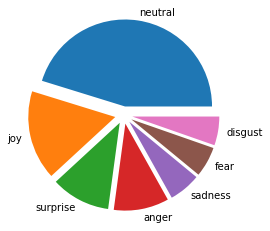

In [6]:
emotions = ['neutral','joy','surprise','anger','sadness','fear','disgust']
explode = (0.1,0.1,0.1,0.1,0.1,0.1,0.1)
plt.pie(train_data['emotion'].value_counts(),
        labels=emotions,
        explode=explode)
plt.show()

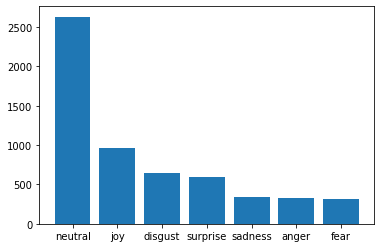

In [7]:
plt.bar(train_data['emotion'].unique(),train_data['emotion'].value_counts())
plt.show()

## Data Pre-processing

In [8]:
from librosa import display
from pathlib import Path

In [9]:
def extract_feature(file_name):
    Data,Sample_rate = librosa.load(Path(file_name))
    mfccs = librosa.feature.mfcc(y=np.array(Data),sr=Sample_rate,n_mfcc=40)
    return np.mean(mfccs.T,axis=0)

In [10]:
train_extract_data = []
for i in train_data['filename']:
    file_name = "IA for AI/Train_mp3/"+i[:-4]+".wav"
    train_extract_data.append(extract_feature(file_name))

D:\Anaconda\lib\site-packages\librosa\core\spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1753
  n_fft, y.shape[-1]


In [11]:
emotions = train_data['emotion']
df = []
for i in range (len(train_extract_data)):
    df.append([np.array(train_extract_data[i]),emotions[i]])

In [12]:
df = pd.DataFrame(df,columns=['Extracted Feature','Emotions'])

In [13]:
df.head()

,Extracted Feature,Emotions
0,"[-353.13693, 222.46886, -83.50476, 27.32059, 3...",neutral
1,"[-361.2677, 202.58221, -90.63126, 18.65389, 29...",neutral
2,"[-430.78775, 213.59877, -58.38628, 54.488453, ...",joy
3,"[-315.41574, 216.89291, -94.157295, 4.435979, ...",neutral
4,"[-459.95938, 190.15335, -69.10232, 19.093431, ...",neutral


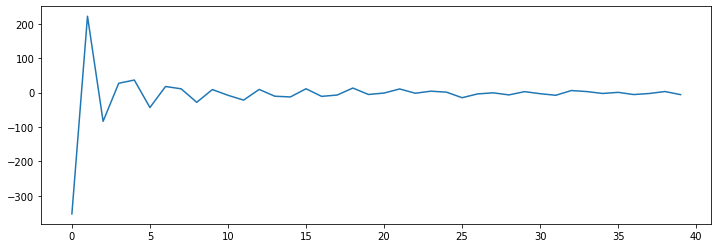

In [14]:
plt.figure(figsize=(12,4))
plt.plot(df['Extracted Feature'][0])

In [15]:
X = np.array(df['Extracted Feature'].tolist())
y = np.array(df['Emotions'].tolist())

In [16]:
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
Y=y
y = to_categorical(label_encoder.fit_transform(y))

In [17]:
from sklearn.model_selection import train_test_split
Xtrain, xtest, ytrain, ytest = train_test_split(X,y,test_size=0.2)

## Model Creation

In [18]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics
from tensorflow.keras import layers

### Using ANN

In [19]:
model = Sequential()

model.add(Dense(100,input_shape=(40,)))
model.add(Dropout(0.5))

model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(num_labels))
model.add(Activation('softmax'))

NameError: name 'num_labels' is not defined

In [ ]:
model.summary()

In [ ]:
model.compile(loss = 'categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime

epoch = 400
num_batch = 60

checkpointer = ModelCheckpoint(filepath='IA for AI/audio_emotion.hdf5',
                              verbose = 1,save_best_only=True)

start = datetime.now()

model.fit(Xtrain,ytrain,batch_size=num_batch,epochs=epoch,validation_data=(xtest,ytest),callbacks=checkpointer)

duration = datetime.now()-start
print(duration)

In [ ]:
test_accuracy = model.evaluate(xtest,ytest,verbose=0)
print(test_accuracy)

## Predicting new data

In [29]:
test_data = pd.read_csv("IA for AI/test.csv")
test_data.head()

,filename
0,26199.mp3
1,692.mp3
2,16821.mp3
3,1608.mp3
4,47947.wav


In [64]:
test_df = []
for i in test_data['filename']:
    file_name = "IA for AI/Test_mp3/"+i[:-4]+".wav"
    test_extract_data = extract_feature(file_name)
    test_pred = np.array(model.predict(test_extract_data.reshape(1,-1)))
    test_label_index = np.argmax(test_pred)
    print(test_label_index)
    label = label_encoder.inverse_transform([test_label_index]).tolist()
    test_df.append([i,label[0]])
    print(file_name," predicted as : ",label)
test_extract_data

4
IA for AI/Test_mp3/26199.wav  predicted as :  ['neutral']
4
IA for AI/Test_mp3/692.wav  predicted as :  ['neutral']
4
IA for AI/Test_mp3/16821.wav  predicted as :  ['neutral']
4
IA for AI/Test_mp3/1608.wav  predicted as :  ['neutral']
1
IA for AI/Test_mp3/47947.wav  predicted as :  ['disgust']
4
IA for AI/Test_mp3/26679.wav  predicted as :  ['neutral']
1
IA for AI/Test_mp3/45080.wav  predicted as :  ['disgust']
4
IA for AI/Test_mp3/15385.wav  predicted as :  ['neutral']
4
IA for AI/Test_mp3/29210.wav  predicted as :  ['neutral']
4
IA for AI/Test_mp3/22481.wav  predicted as :  ['neutral']
4
IA for AI/Test_mp3/6972.wav  predicted as :  ['neutral']
4
IA for AI/Test_mp3/24411.wav  predicted as :  ['neutral']
4
IA for AI/Test_mp3/23056.wav  predicted as :  ['neutral']
4
IA for AI/Test_mp3/4077.wav  predicted as :  ['neutral']
4
IA for AI/Test_mp3/26170.wav  predicted as :  ['neutral']
4
IA for AI/Test_mp3/26880.wav  predicted as :  ['neutral']
4
IA for AI/Test_mp3/21753.wav  predicted as 

D:\Anaconda\lib\site-packages\librosa\core\spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1753
  n_fft, y.shape[-1]


4
IA for AI/Test_mp3/13757.wav  predicted as :  ['neutral']
1
IA for AI/Test_mp3/42511.wav  predicted as :  ['disgust']
1
IA for AI/Test_mp3/48770.wav  predicted as :  ['disgust']
4
IA for AI/Test_mp3/6208.wav  predicted as :  ['neutral']
4
IA for AI/Test_mp3/17623.wav  predicted as :  ['neutral']
4
IA for AI/Test_mp3/26230.wav  predicted as :  ['neutral']
4
IA for AI/Test_mp3/29720.wav  predicted as :  ['neutral']
1
IA for AI/Test_mp3/46873.wav  predicted as :  ['disgust']
4
IA for AI/Test_mp3/17716.wav  predicted as :  ['neutral']
4
IA for AI/Test_mp3/17882.wav  predicted as :  ['neutral']
4
IA for AI/Test_mp3/23671.wav  predicted as :  ['neutral']
4
IA for AI/Test_mp3/10778.wav  predicted as :  ['neutral']
4
IA for AI/Test_mp3/3351.wav  predicted as :  ['neutral']
4
IA for AI/Test_mp3/22701.wav  predicted as :  ['neutral']
4
IA for AI/Test_mp3/29680.wav  predicted as :  ['neutral']
4
IA for AI/Test_mp3/29728.wav  predicted as :  ['neutral']
4
IA for AI/Test_mp3/3135.wav  predicted a

IA for AI/Test_mp3/14462.wav  predicted as :  ['neutral']
4
IA for AI/Test_mp3/1761.wav  predicted as :  ['neutral']
4
IA for AI/Test_mp3/26240.wav  predicted as :  ['neutral']
4
IA for AI/Test_mp3/24064.wav  predicted as :  ['neutral']
4
IA for AI/Test_mp3/10953.wav  predicted as :  ['neutral']
4
IA for AI/Test_mp3/27548.wav  predicted as :  ['neutral']
4
IA for AI/Test_mp3/10885.wav  predicted as :  ['neutral']
4
IA for AI/Test_mp3/27176.wav  predicted as :  ['neutral']
4
IA for AI/Test_mp3/2448.wav  predicted as :  ['neutral']
4
IA for AI/Test_mp3/7173.wav  predicted as :  ['neutral']
1
IA for AI/Test_mp3/41160.wav  predicted as :  ['disgust']
4
IA for AI/Test_mp3/12768.wav  predicted as :  ['neutral']
4
IA for AI/Test_mp3/13012.wav  predicted as :  ['neutral']
4
IA for AI/Test_mp3/10539.wav  predicted as :  ['neutral']
4
IA for AI/Test_mp3/22474.wav  predicted as :  ['neutral']
4
IA for AI/Test_mp3/25615.wav  predicted as :  ['neutral']
1
IA for AI/Test_mp3/41378.wav  predicted as 

IA for AI/Test_mp3/15817.wav  predicted as :  ['neutral']
4
IA for AI/Test_mp3/1279.wav  predicted as :  ['neutral']
4
IA for AI/Test_mp3/28066.wav  predicted as :  ['neutral']
4
IA for AI/Test_mp3/17900.wav  predicted as :  ['neutral']
4
IA for AI/Test_mp3/14985.wav  predicted as :  ['neutral']
4
IA for AI/Test_mp3/18346.wav  predicted as :  ['neutral']
4
IA for AI/Test_mp3/5302.wav  predicted as :  ['neutral']
4
IA for AI/Test_mp3/12876.wav  predicted as :  ['neutral']
4
IA for AI/Test_mp3/21870.wav  predicted as :  ['neutral']
4
IA for AI/Test_mp3/11624.wav  predicted as :  ['neutral']
4
IA for AI/Test_mp3/1153.wav  predicted as :  ['neutral']
4
IA for AI/Test_mp3/5301.wav  predicted as :  ['neutral']
4
IA for AI/Test_mp3/1449.wav  predicted as :  ['neutral']
1
IA for AI/Test_mp3/42213.wav  predicted as :  ['disgust']
4
IA for AI/Test_mp3/11906.wav  predicted as :  ['neutral']
4
IA for AI/Test_mp3/2130.wav  predicted as :  ['neutral']
4
IA for AI/Test_mp3/663.wav  predicted as :  ['

IA for AI/Test_mp3/22762.wav  predicted as :  ['neutral']
4
IA for AI/Test_mp3/6467.wav  predicted as :  ['neutral']
4
IA for AI/Test_mp3/21676.wav  predicted as :  ['neutral']
1
IA for AI/Test_mp3/51238.wav  predicted as :  ['disgust']
4
IA for AI/Test_mp3/26957.wav  predicted as :  ['neutral']
4
IA for AI/Test_mp3/4607.wav  predicted as :  ['neutral']
4
IA for AI/Test_mp3/18421.wav  predicted as :  ['neutral']
4
IA for AI/Test_mp3/6308.wav  predicted as :  ['neutral']
4
IA for AI/Test_mp3/1376.wav  predicted as :  ['neutral']
4
IA for AI/Test_mp3/4168.wav  predicted as :  ['neutral']
4
IA for AI/Test_mp3/17707.wav  predicted as :  ['neutral']
4
IA for AI/Test_mp3/22894.wav  predicted as :  ['neutral']
4
IA for AI/Test_mp3/26176.wav  predicted as :  ['neutral']
4
IA for AI/Test_mp3/3168.wav  predicted as :  ['neutral']
1
IA for AI/Test_mp3/49010.wav  predicted as :  ['disgust']
4
IA for AI/Test_mp3/6506.wav  predicted as :  ['neutral']
4
IA for AI/Test_mp3/4952.wav  predicted as :  ['

IA for AI/Test_mp3/25463.wav  predicted as :  ['neutral']
4
IA for AI/Test_mp3/18115.wav  predicted as :  ['neutral']
4
IA for AI/Test_mp3/7091.wav  predicted as :  ['neutral']
4
IA for AI/Test_mp3/28562.wav  predicted as :  ['neutral']
4
IA for AI/Test_mp3/1238.wav  predicted as :  ['neutral']
4
IA for AI/Test_mp3/26040.wav  predicted as :  ['neutral']
4
IA for AI/Test_mp3/6765.wav  predicted as :  ['neutral']
4
IA for AI/Test_mp3/5227.wav  predicted as :  ['neutral']
1
IA for AI/Test_mp3/50081.wav  predicted as :  ['disgust']
4
IA for AI/Test_mp3/6230.wav  predicted as :  ['neutral']
4
IA for AI/Test_mp3/28240.wav  predicted as :  ['neutral']
4
IA for AI/Test_mp3/7881.wav  predicted as :  ['neutral']
4
IA for AI/Test_mp3/18364.wav  predicted as :  ['neutral']
4
IA for AI/Test_mp3/6072.wav  predicted as :  ['neutral']
1
IA for AI/Test_mp3/40408.wav  predicted as :  ['disgust']
1
IA for AI/Test_mp3/43697.wav  predicted as :  ['disgust']
4
IA for AI/Test_mp3/22996.wav  predicted as :  [

IA for AI/Test_mp3/6077.wav  predicted as :  ['neutral']
4
IA for AI/Test_mp3/14873.wav  predicted as :  ['neutral']
4
IA for AI/Test_mp3/22468.wav  predicted as :  ['neutral']
1
IA for AI/Test_mp3/41748.wav  predicted as :  ['disgust']
1
IA for AI/Test_mp3/44711.wav  predicted as :  ['disgust']
4
IA for AI/Test_mp3/24308.wav  predicted as :  ['neutral']
4
IA for AI/Test_mp3/2986.wav  predicted as :  ['neutral']
4
IA for AI/Test_mp3/22153.wav  predicted as :  ['neutral']
4
IA for AI/Test_mp3/17467.wav  predicted as :  ['neutral']
4
IA for AI/Test_mp3/2799.wav  predicted as :  ['neutral']
4
IA for AI/Test_mp3/304.wav  predicted as :  ['neutral']
4
IA for AI/Test_mp3/5930.wav  predicted as :  ['neutral']
4
IA for AI/Test_mp3/11300.wav  predicted as :  ['neutral']
4
IA for AI/Test_mp3/1524.wav  predicted as :  ['neutral']
4
IA for AI/Test_mp3/6750.wav  predicted as :  ['neutral']
4
IA for AI/Test_mp3/17510.wav  predicted as :  ['neutral']
4
IA for AI/Test_mp3/24060.wav  predicted as :  ['

IA for AI/Test_mp3/1399.wav  predicted as :  ['neutral']
4
IA for AI/Test_mp3/28072.wav  predicted as :  ['neutral']
4
IA for AI/Test_mp3/6509.wav  predicted as :  ['neutral']
4
IA for AI/Test_mp3/2227.wav  predicted as :  ['neutral']
1
IA for AI/Test_mp3/47482.wav  predicted as :  ['disgust']
1
IA for AI/Test_mp3/42083.wav  predicted as :  ['disgust']
4
IA for AI/Test_mp3/6821.wav  predicted as :  ['neutral']
4
IA for AI/Test_mp3/18170.wav  predicted as :  ['neutral']
4
IA for AI/Test_mp3/28247.wav  predicted as :  ['neutral']
4
IA for AI/Test_mp3/22742.wav  predicted as :  ['neutral']
4
IA for AI/Test_mp3/25759.wav  predicted as :  ['neutral']
4
IA for AI/Test_mp3/15690.wav  predicted as :  ['neutral']
4
IA for AI/Test_mp3/18494.wav  predicted as :  ['neutral']
4
IA for AI/Test_mp3/11440.wav  predicted as :  ['neutral']
4
IA for AI/Test_mp3/27700.wav  predicted as :  ['neutral']
4
IA for AI/Test_mp3/16430.wav  predicted as :  ['neutral']
4
IA for AI/Test_mp3/6372.wav  predicted as : 

IA for AI/Test_mp3/7243.wav  predicted as :  ['neutral']
4
IA for AI/Test_mp3/2320.wav  predicted as :  ['neutral']
4
IA for AI/Test_mp3/18371.wav  predicted as :  ['neutral']
4
IA for AI/Test_mp3/4729.wav  predicted as :  ['neutral']
4
IA for AI/Test_mp3/15996.wav  predicted as :  ['neutral']
4
IA for AI/Test_mp3/27585.wav  predicted as :  ['neutral']
4
IA for AI/Test_mp3/1515.wav  predicted as :  ['neutral']
4
IA for AI/Test_mp3/5707.wav  predicted as :  ['neutral']
4
IA for AI/Test_mp3/14983.wav  predicted as :  ['neutral']
4
IA for AI/Test_mp3/3374.wav  predicted as :  ['neutral']
4
IA for AI/Test_mp3/16429.wav  predicted as :  ['neutral']
4
IA for AI/Test_mp3/15310.wav  predicted as :  ['neutral']
4
IA for AI/Test_mp3/11993.wav  predicted as :  ['neutral']
4
IA for AI/Test_mp3/6457.wav  predicted as :  ['neutral']
4
IA for AI/Test_mp3/6289.wav  predicted as :  ['neutral']
4
IA for AI/Test_mp3/28300.wav  predicted as :  ['neutral']
4
IA for AI/Test_mp3/13723.wav  predicted as :  ['

IA for AI/Test_mp3/48924.wav  predicted as :  ['disgust']
4
IA for AI/Test_mp3/2790.wav  predicted as :  ['neutral']
4
IA for AI/Test_mp3/6407.wav  predicted as :  ['neutral']
4
IA for AI/Test_mp3/29327.wav  predicted as :  ['neutral']
4
IA for AI/Test_mp3/21594.wav  predicted as :  ['neutral']
4
IA for AI/Test_mp3/11124.wav  predicted as :  ['neutral']
4
IA for AI/Test_mp3/15582.wav  predicted as :  ['neutral']
4
IA for AI/Test_mp3/1865.wav  predicted as :  ['neutral']
4
IA for AI/Test_mp3/13363.wav  predicted as :  ['neutral']
4
IA for AI/Test_mp3/3435.wav  predicted as :  ['neutral']
4
IA for AI/Test_mp3/7605.wav  predicted as :  ['neutral']
4
IA for AI/Test_mp3/2748.wav  predicted as :  ['neutral']
4
IA for AI/Test_mp3/1594.wav  predicted as :  ['neutral']
4
IA for AI/Test_mp3/29007.wav  predicted as :  ['neutral']
4
IA for AI/Test_mp3/16683.wav  predicted as :  ['neutral']
4
IA for AI/Test_mp3/26115.wav  predicted as :  ['neutral']
4
IA for AI/Test_mp3/5981.wav  predicted as :  ['

array([-4.1192307e+02,  1.9807014e+02, -8.4195107e+01,  2.0695757e+01,
        2.4946272e+01, -4.9669430e+01,  1.0770377e+01,  3.5434272e+00,
       -3.0806559e+01,  1.1820561e+01, -2.4436250e+00, -1.9415462e+01,
        1.1656166e+01, -1.8364516e+00, -3.5595491e+00,  1.6937059e+01,
       -2.7137511e+00,  3.4576172e-01,  1.4888084e+01, -3.8704224e+00,
        7.6919883e-01,  7.4573565e+00, -8.1252651e+00,  4.3380257e-01,
        3.5320220e+00, -6.5766783e+00,  4.7003188e+00,  2.5733387e+00,
       -6.6126933e+00,  4.4942403e+00,  1.7616268e+00, -3.0826902e+00,
        5.1432700e+00, -1.2861594e+00, -2.2701406e+00,  5.8630786e+00,
       -1.8889533e+00, -8.4328395e-01,  6.6767521e+00, -1.2717247e+00],
      dtype=float32)

In [67]:
test_df=pd.DataFrame(test_df,columns=['filename','emotion'],index=False)

In [77]:
test_df[1].value_counts()

neutral    2266
disgust     223
fear          3
Name: 1, dtype: int64

In [78]:
import pickle

In [79]:
test_df.to_csv("IA for AI.csv")

## Rough Code

In [12]:
data[0]

array([-1.8544512e-02, -1.5696980e-02, -1.1085571e-02, ...,
       -3.4210603e-05, -1.4683382e-04,  0.0000000e+00], dtype=float32)

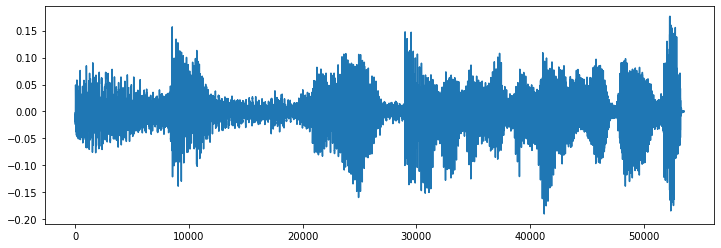

In [13]:
plt.figure(figsize=(12,4))
plt.plot(data[0])

In [14]:
from scipy.io import wavfile as wav
wav , sample = wav.read("IA for AI/Train_mp3/0.wav")

[[ -493   141]
 [ -903   214]
 [-1708 -1547]
 ...
 [-2172 -1630]
 [-1344  -909]
 [-1371 -1369]]


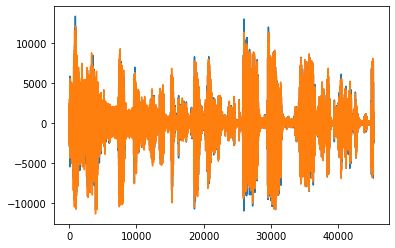

In [15]:
print(sample)
plt.plot(sample)

In [16]:
print(data[0].shape)
mfccs = librosa.feature.mfcc(y=np.array(data[0]),sr=22050,n_mfcc=40)
np.array(mfccs).shape

(53549,)


(40, 105)

In [29]:
train = []
emotion = train_data['emotion']
j=0
for i in range (len(data)):
    temp = librosa.feature.mfcc(y=np.array(data[i]),sr=22050,n_mfcc=40)
    train.append([np.mean(temp.T,axis=0),emotion[i]])

D:\Anaconda\lib\site-packages\librosa\core\spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1753
  n_fft, y.shape[-1]


In [30]:
temp.shape

(40, 111)

In [31]:
extracted_data = pd.DataFrame(train,columns=["Extract Feature","Emotions"])

In [33]:
extracted_data.head()

,Extract Feature,Emotions
0,"[-353.13693, 222.46886, -83.50476, 27.32059, 3...",neutral
1,"[-361.2677, 202.58221, -90.63126, 18.65389, 29...",neutral
2,"[-430.78775, 213.59877, -58.38628, 54.488453, ...",joy
3,"[-315.41574, 216.89291, -94.157295, 4.435979, ...",neutral
4,"[-459.95938, 190.15335, -69.10232, 19.093431, ...",neutral


In [128]:
X = np.array(extracted_data['Extract Feature'].tolist())
y = np.array(extracted_data['Emotions'].tolist())

In [35]:
X.shape

(5815, 40)

In [129]:
from sklearn.preprocessing import LabelEncoder
laber_encoder = LabelEncoder()
y = laber_encoder.fit_transform(y)

In [63]:
x = label_encoder.inverse_transform([2]).tolist()
x[0]

'fear'

In [39]:
from sklearn.model_selection import train_test_split
Xtrain, xtest, ytrain, ytest = train_test_split(X,y,test_size=0.2)

In [40]:
Xtrain.shape

(4652, 40)

In [41]:
ytrain.shape

(4652, 7)

In [42]:
xtest.shape

(1163, 40)

In [43]:
ytest.shape

(1163, 7)

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 1, 0, 0]], dtype=uint8)

In [142]:
test_pred = []
for i in test_extract_data:
    test_pred.append(np.array(model.predict(np.array(i).reshape(1,-1))))

In [143]:
test_pred[0]

array([[0.10898883, 0.00852998, 0.01042115, 0.18253142, 0.50116044,
        0.06779732, 0.12057093]], dtype=float32)

In [146]:
test_label= []
for i in test_pred:
    test_label.append(np.argmax(i,axis=1))

In [165]:
result = laber_encoder.inverse_transform(test_label)